In [32]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import matplotlib.pyplot as plt

In [33]:
b_cancer = pd.read_csv('breast_cancer_datasets.csv')

In [34]:
b_cancer.head()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diseases,Target
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.1471,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.186,0.2750,0.08902,malignant,0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.1279,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,malignant,0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.1052,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant,0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198,0.1043,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4,0.1625,0.2364,0.07678,malignant,0


In [35]:
b_cancer.shape

(569, 33)

In [36]:
b_cancer.columns

Index(['Unnamed: 0', 'mean radius', 'mean texture', 'mean perimeter',
       'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'Diseases', 'Target'],
      dtype='object')

In [37]:
b_cancer.Target.unique()

array([0, 1], dtype=int64)

In [38]:
b_cancer.isna().sum()

Unnamed: 0                 0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Diseases                   0
Target                     0
dtype: int64

In [39]:
b_cancer[['mean radius', 'mean texture']]

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [40]:
b_cancer.Target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: Target, Length: 569, dtype: int64

In [41]:
X = b_cancer[['mean radius', 'mean texture']]
y = b_cancer['Target']

In [42]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


X_train, X_test, y_train , y_test = train_test_split(X,y, random_state = 67)

In [43]:
scores = []
k_range = range(1,100)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

Highest Scores: 0.9440559440559441


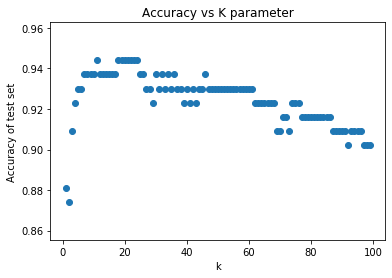

In [44]:
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy of test set')
plt.title('Accuracy vs K parameter')
plt.scatter(k_range, scores)
print(f'Highest Scores: {max(scores)}')

[10, 25, 0.94, 1]

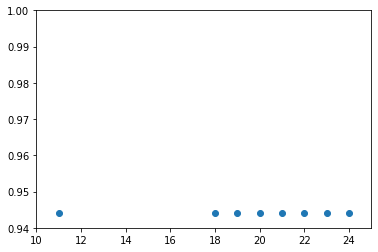

In [45]:
plt.scatter(k_range,scores)
plt.axis([10,25,.94,1])

### Lets Normalize and See

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [47]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scores = []
k_range = range(1,100)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

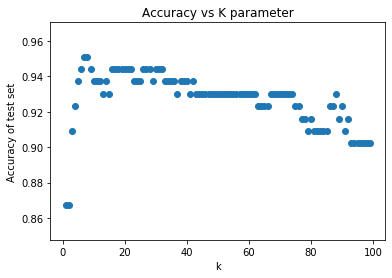

In [48]:
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy of test set')
plt.title('Accuracy vs K parameter')
plt.scatter(k_range, scores)

0.951048951048951


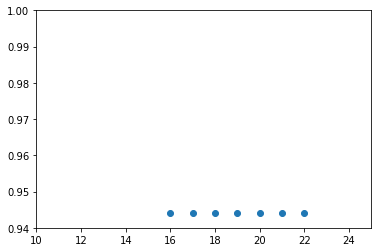

In [49]:
plt.scatter(k_range,scores)
plt.axis([10,25,.94,1])
print(max(scores))

##### We get probably same as before

### Lets Try With whole Datasets

In [50]:
b_cancer.head()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diseases,Target
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.1471,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.186,0.2750,0.08902,malignant,0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.1279,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,malignant,0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.1052,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant,0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198,0.1043,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4,0.1625,0.2364,0.07678,malignant,0


In [51]:
import seaborn as sns

sns.pairplot(data=b_cancer)
plt.savefig('breast_cancer pairplot.jpg')

In [52]:
from sklearn.datasets import make_friedman1
from sklearn.datasets import make_regression

In [53]:
b_cancer[['Target','Diseases']]

,Target,Diseases
0,0,malignant
1,0,malignant
2,0,malignant
3,0,malignant
4,0,malignant
...,...,...
564,0,malignant
565,0,malignant
566,0,malignant
567,0,malignant


In [54]:
b_cancer.Diseases.unique()

array(['malignant', 'benign'], dtype=object)

In [55]:
b_cancer.describe()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,texture error,...,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,284.000000,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.181162,0.062798,1.216853,...,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.290076,0.083946,0.627417
std,164.400426,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.027414,0.007060,0.551648,...,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.061867,0.018061,0.483918
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.106000,0.049960,0.360200,...,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.156500,0.055040,0.000000
25%,142.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.161900,0.057700,0.833900,...,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.250400,0.071460,0.000000
50%,284.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.179200,0.061540,1.108000,...,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.282200,0.080040,1.000000
75%,426.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.195700,0.066120,1.474000,...,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.317900,0.092080,1.000000
max,568.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.304000,0.097440,4.885000,...,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,0.663800,0.207500,1.000000


In [56]:
X,y = b_cancer[['mean radius', 'mean texture', 'mean perimeter',
       'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']], b_cancer['Target']

### Lets Train The Data

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 67)

k_range = range(1,100)
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)
    train_score = knn.scores(X_train, y_train)
    test_score = knn.scores(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    

In [59]:
malignant = b_cancer[b_cancer['Diseases'] == 'malignant']

In [60]:
malignant['Target'].unique()

array([0], dtype=int64)

In [61]:
benign = b_cancer[b_cancer['Diseases'] == 'benign']

In [62]:
benign['Target'].unique()

array([1], dtype=int64)

In [63]:
b_cancer['Diseases'].unique()

array(['malignant', 'benign'], dtype=object)

In [64]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.1471,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.186,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.1279,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.243,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.1052,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198,0.1043,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.2439,0.1389,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.152,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.265,0.4087,0.12400


In [65]:
b_cancer_clean = b_cancer == 'malignant'

C:\Users\User\anaconda\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [66]:
b_cancer_clean.sum()

Unnamed: 0                   0
mean radius                  0
mean texture                 0
mean perimeter               0
mean area                    0
mean smoothness              0
mean compactness             0
mean concavity              13
mean concave points         13
mean symmetry                0
mean fractal dimension       0
radius error                 0
texture error                0
perimeter error              0
area error                   0
smoothness error             0
compactness error            0
concavity error             13
concave points error        13
symmetry error               0
fractal dimension error      0
worst radius                 0
worst texture                0
worst perimeter              0
worst area                   0
worst smoothness             0
worst compactness            0
worst concavity             13
worst concave points        13
worst symmetry               0
worst fractal dimension      0
Diseases                   212
Target  

In [67]:
b_cancer.replace(['malignant'], [np.nan],inplace= True)

In [68]:
b_cancer.isna().sum()

Unnamed: 0                   0
mean radius                  0
mean texture                 0
mean perimeter               0
mean area                    0
mean smoothness              0
mean compactness             0
mean concavity              13
mean concave points         13
mean symmetry                0
mean fractal dimension       0
radius error                 0
texture error                0
perimeter error              0
area error                   0
smoothness error             0
compactness error            0
concavity error             13
concave points error        13
symmetry error               0
fractal dimension error      0
worst radius                 0
worst texture                0
worst perimeter              0
worst area                   0
worst smoothness             0
worst compactness            0
worst concavity             13
worst concave points        13
worst symmetry               0
worst fractal dimension      0
Diseases                   212
Target  

In [69]:
b_cancer.isna().sum()

Unnamed: 0                   0
mean radius                  0
mean texture                 0
mean perimeter               0
mean area                    0
mean smoothness              0
mean compactness             0
mean concavity              13
mean concave points         13
mean symmetry                0
mean fractal dimension       0
radius error                 0
texture error                0
perimeter error              0
area error                   0
smoothness error             0
compactness error            0
concavity error             13
concave points error        13
symmetry error               0
fractal dimension error      0
worst radius                 0
worst texture                0
worst perimeter              0
worst area                   0
worst smoothness             0
worst compactness            0
worst concavity             13
worst concave points        13
worst symmetry               0
worst fractal dimension      0
Diseases                   212
Target  

In [70]:
b_cancer_numeric = b_cancer.drop(columns= ['Diseases', 'Target'])

In [71]:
cols_b_numeric = b_cancer_numeric.columns

In [72]:
cols_b_numeric

Index(['Unnamed: 0', 'mean radius', 'mean texture', 'mean perimeter',
       'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [73]:
b_cancer_numeric.iloc[161]

Unnamed: 0                      161
mean radius                   19.19
mean texture                  15.94
mean perimeter                126.3
mean area                      1157
mean smoothness             0.08694
mean compactness             0.1185
mean concavity               0.1193
mean concave points         0.09667
mean symmetry                0.1741
mean fractal dimension      0.05176
radius error                 benign
texture error                0.6336
perimeter error               6.971
area error                    119.3
smoothness error           0.009406
compactness error           0.03055
concavity error             0.04344
concave points error        0.02794
symmetry error              0.03156
fractal dimension error    0.003362
worst radius                  22.03
worst texture                 17.81
worst perimeter               146.6
worst area                     1495
worst smoothness             0.1124
worst compactness            0.2016
worst concavity             

In [74]:
b_cancer_numeric = b_cancer_numeric.replace(['benign'], [np.nan])

In [75]:
b_cancer_numeric.isna().sum()

Unnamed: 0                  0
mean radius                 0
mean texture                0
mean perimeter              0
mean area                   0
mean smoothness             0
mean compactness            0
mean concavity             13
mean concave points        13
mean symmetry               0
mean fractal dimension      0
radius error                1
texture error               0
perimeter error             0
area error                  0
smoothness error            0
compactness error           0
concavity error            13
concave points error       13
symmetry error              0
fractal dimension error     0
worst radius                0
worst texture               0
worst perimeter             0
worst area                  0
worst smoothness            0
worst compactness           0
worst concavity            13
worst concave points       13
worst symmetry              0
worst fractal dimension     0
dtype: int64

In [76]:
for col in cols_b_numeric: 
    b_cancer_numeric[col] =  pd.to_numeric(b_cancer_numeric[col])

In [77]:
columns_including_nan = ['mean concavity','mean concave points','radius error', 'concavity error',
                         'concave points error','worst concavity','worst concave points']

In [114]:
b_cancer_numeric['worst '] = pd.to_numeric(b_cancer_numeric['worst concave points'])

In [115]:
b_cancer_numeric['mean concavity'].sum()

51.70819296456835

In [116]:
b_cancer_numeric.sum()

Unnamed: 0                 161596.000000
mean radius                  8038.429000
mean texture                10975.810000
mean perimeter              52330.380000
mean area                  372631.900000
mean smoothness                54.829000
mean compactness               59.370020
mean concavity                 51.708193
mean concave points            29.016376
mean symmetry                 103.081100
mean fractal dimension         35.731840
radius error                  229.633776
texture error                 692.389600
perimeter error              1630.787700
area error                  22951.798000
smoothness error                4.006317
compactness error              14.497061
concavity error                19.328907
concave points error            7.893384
symmetry error                 11.688568
fractal dimension error         2.159300
worst radius                 9257.169000
worst texture               14610.340000
worst perimeter             61031.630000
worst area      

In [118]:
columns_including_nan.append('worst ')
columns_including_nan

['mean concavity',
 'mean concave points',
 'radius error',
 'concavity error',
 'concave points error',
 'worst concavity',
 'worst concave points',
 'worst ',
 'worst ']

In [119]:
means = list(b_cancer_numeric[columns_including_nan].mean())
means = means[:]
means

[0.09087555881294962,
 0.05099538886567369,
 0.40357429799439914,
 0.0339699593401904,
 0.013872380078327496,
 0.27426472629976834,
 0.11668246619432052,
 0.11668246619432052,
 0.11668246619432052]

In [120]:
for mean in means:
    for column in columns_including_nan:
        b_cancer_numeric[column].fillna(mean, inplace= True)

In [121]:
b_cancer_numeric.isna().sum()

Unnamed: 0                 0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
worst                      0
Target                     0
worst                      0
dtype: int64

In [122]:
b_cancer_numeric.shape

(569, 34)

In [123]:
b_cancer_ = b_cancer_numeric

In [124]:
b_cancer_['Target'] = b_cancer['Target']

In [100]:
b_cancer_x = b_cancer_.drop(columns='Target')

In [125]:
b_cancer_.head()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,worst,Target,worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.2654,0,0.2654
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.1860,0,0.1860
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.2430,0,0.2430
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.2575,0,0.2575
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.1625,0,0.1625


In [113]:
b_cancer_['worst '].isna().sum()

13

In [126]:
b_cancer_ = b_cancer_.drop(columns='worst')

In [127]:
b_cancer_.to_csv('')

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,worst,Target
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,184.60,2019.0,0.16220,0.66560,0.711900,0.265400,0.4601,0.11890,0.265400,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902,0.186000,0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,152.50,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758,0.243000,0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300,0.257500,0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,152.20,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678,0.162500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.243900,0.138900,0.1726,...,166.10,2027.0,0.14100,0.21130,0.410700,0.221600,0.2060,0.07115,0.221600,0
565,565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,...,155.00,1731.0,0.11660,0.19220,0.321500,0.162800,0.2572,0.06637,0.162800,0
566,566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.053020,0.1590,...,126.70,1124.0,0.11390,0.30940,0.340300,0.141800,0.2218,0.07820,0.141800,0
567,567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.351400,0.152000,0.2397,...,184.60,1821.0,0.16500,0.86810,0.938700,0.265000,0.4087,0.12400,0.265000,0


In [101]:
X, y = b_cancer_x, b_cancer_['Target']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state = 42)

In [92]:
k_range = range(1,100)
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))    

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

ValueError: x and y must be the same size

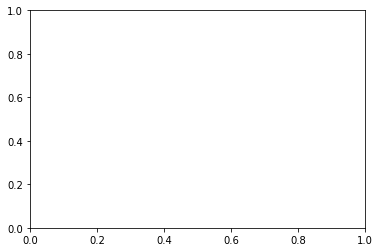

In [93]:
plt.scatter(k_range, train_scores, marker = '*', color = 'purple')
plt.xlabel('k')
plt.ylabel('Train Score')
plt.title('Training Score in KNN')
plt.show()
plt.savefig('Breast Cancer/Training Score in knn.png')

In [ ]:
plt.scatter(k_range, test_scores, marker = '^', color = 'red')
plt.xlabel('k')
plt.ylabel('Test Score')
plt.title('Testing Score in KNN')
plt.show()
plt.savefig('Breast Cancer/Testing Score in knn.png')

In [ ]:
plt.scatter(k_range, test_scores, marker = '^', color = 'red')
plt.xlabel('k')
plt.ylabel('Test Score')
plt.title('Testing Score in KNN')
plt.axis([5,20, 0.85,1])
plt.show()
plt.savefig('Breast Cancer/Testing broad Score in knn.png')

In [ ]:
test_scores[8]

# In k = 8, 9 the model gives 0.97% accuracy

#### Lets Try By Normalization

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
k_range = range(1,100)
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train_scaled, y_train)
    
    train_scores.append(knn.score(X_train_scaled,y_train))
    test_scores.append(knn.score(X_test_scaled,y_test))    

In [ ]:
plt.scatter(k_range, train_scores, marker = '*', color = 'purple')
plt.xlabel('k')
plt.ylabel('Train Score')
plt.title('Training Score in KNN')
plt.show()
plt.savefig('Breast Cancer/Normalization Training Score in knn.png')

In [ ]:
plt.scatter(k_range, test_scores, marker = '^', color = 'red')
plt.xlabel('k')
plt.ylabel('Test Score')
plt.title('Testing Score in KNN')
plt.show()
plt.savefig('Breast Cancer/Normalization Testing Score in knn.png')

In [ ]:
plt.scatter(k_range, test_scores, marker = '^', color = 'red')
plt.xlabel('k')
plt.ylabel('Test Score')
plt.title('Testing Score in KNN')
plt.axis([0,18, 0.85,1])
plt.show()
plt.savefig('Breast Cancer/Normalization Testing broad Score in knn.png')

In [ ]:
test_scores[14]

### We got same result in generalization and normalization!!

## Lets Try with Logistic Regression

In [ ]:
clf = LogisticRegression().fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)*100}%')
print(f'Testing Score: {clf.score(X_test, y_test)*100}%')

In [ ]:
lr_train_score = clf.score(X_train,y_train)
lr_test_score = clf.score(X_test,y_test)

##### quite good!!

#### now with normalization

In [ ]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)*100}%')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)*100}%')

#### same as before!!

### Now with SVM

In [ ]:
c_range = [0.1,1,15,250]
gamma_range = [.01,1,5]
train_score_linear_kernel = []
test_score_linear_kernal = []

for c in c_range:
    for gamma in gamma_range:
        clf = SVC(kernel = 'linear', C = c, gamma= gamma).fit(X_train, y_train)
        train_score_linear_kernel.append(clf.score(X_train, y_train))
        test_score_linear_kernal.append(clf.score(X_test,y_test))

In [ ]:
print(f'Highest Training Score: {max(train_score_linear_kernel)*100}%')
print(f'Highest Testing Score: {max(test_score_linear_kernal)*100}%')

In [ ]:
length_train = len(train_score_linear_kernel)
n_training = range(0,length_train)

plt.scatter(n_training, train_score_linear_kernel)
plt.grid()
plt.title('Training Performance in SVM\nkernel=linear')
plt.xlabel('Number of Training')
plt.ylabel('Percentage')
plt.show()
plt.savefig('Breast Cancer/Training Score in SVM linear.png')

In [ ]:
length_test = len(test_score_linear_kernal)
n_training = range(0,length_test)

plt.scatter(n_training, test_score_linear_kernal)
plt.grid()
plt.title('Testing Performance in SVM\nkernel=linear')
plt.xlabel('Number of Testing')
plt.ylabel('Percentage')
plt.show()
plt.savefig('Breast Cancer/Testing Score in SVM linear.png')

#### lets try with rbf kernel

In [ ]:
c_range = [0.1,1,15,250]
gamma_range = [.01,1,5]
train_score_rbf_kernel = []
test_score_rbf_kernel = []

for c in c_range:
    for gamma in gamma_range:
        clf = SVC(kernel = 'rbf', C = c, gamma= gamma).fit(X_train, y_train)
        train_score_rbf_kernel.append(clf.score(X_train, y_train))
        test_score_rbf_kernel.append(clf.score(X_test,y_test))

In [ ]:
print(f'Highest Training Score: {max(train_score_rbf_kernel)*100}%')
print(f'Highest Testing Score: {max(test_score_rbf_kernel)*100}%')

In [ ]:
length_train = len(train_score_rbf_kernel)
n_training = range(0,length_train)

plt.scatter(n_training, train_score_rbf_kernel)
plt.grid()
plt.title('Training Performance in SVM\nkernel=RBF')
plt.xlabel('Number of Training')
plt.ylabel('Percentage')
plt.show()
plt.savefig('Breast Cancer/Training Score in SVM rbf.png')

In [ ]:
length_test = len(test_score_linear_kernal)
n_training = range(0,length_test)

plt.scatter(n_training, test_score_linear_kernal)
plt.grid()
plt.title('Testing Performance in SVM\nkernel=RBF')
plt.xlabel('Number of Testing')
plt.ylabel('Percentage')
plt.show()
plt.savefig('Breast Cancer/Testing Score in SVM rbf.png')

##### same in both kernel

#### lets try with polynomial kernel

In [ ]:
degree_range = range(1,20)
train_score_poly_kernel = []
test_score_poly_kernel = []

for n in degree_range:
    clf = SVC(kernel = 'poly', degree= n).fit(X_train, y_train)
    train_score_poly_kernel.append(clf.score(X_train, y_train))
    test_score_poly_kernel.append(clf.score(X_test,y_test))

In [ ]:
print(f'Highest Training Score: {max(train_score_poly_kernel)*100}%')
print(f'Highest Testing Score: {max(test_score_poly_kernel)*100}%')

In [ ]:
plt.scatter(degree_range, train_score_poly_kernel)
plt.grid()
plt.title('Training Performance in SVM\nkernel= Polynomial')
plt.xlabel('Number of Training')
plt.ylabel('Percentage')
plt.show()
plt.savefig('Breast Cancer/Training Score in SVM polynomial.png')

In [ ]:
plt.scatter(degree_range, test_score_poly_kernel)
plt.grid()
plt.title('Testing Performance in SVM\nkernel= Polynomial')
plt.xlabel('Number of Testing')
plt.ylabel('Percentage')
plt.show()
plt.savefig('Breast Cancer/Testing Score in SVM polynomial.png')

In [ ]:
all_train_score = [train_score_linear_kernel,train_score_poly_kernel,
                   train_score_rbf_kernel,train_scores, lr_train_score]

all_test_score = [test_score_linear_kernal, test_score_poly_kernel,
                 test_score_rbf_kernel, test_scores, lr_test_score]

In [ ]:
print(f'Highest Training Score in KNN: {max(train_scores)*100}%')
print(f'Highest Testing Score in KNN: {max(test_scores)*100}%\n')
print(f'Highest Training Score in Logistic_R: {lr_train_score*100}%')
print(f'Highest Testing Score in Logistic_R: {lr_test_score*100}%\n')
print(f'Highest Training Score in SVM Linear: {max(train_score_linear_kernel)*100}%')
print(f'Highest Testing Score in SVM Linear: {max(test_score_linear_kernal)*100}%\n')
print(f'Highest Training Score in SVM Polynomial: {max(train_score_poly_kernel)*100}%')
print(f'Highest Testing Score in SVM Polynomial: {max(test_score_poly_kernel)*100}%\n')
print(f'Highest Training Score in SVM RBF: {max(train_score_rbf_kernel)*100}%')
print(f'Highest Testing Score in SVM RBF: {max(test_score_rbf_kernel)*100}%')

In [ ]:
n = range(1,100)
n_linear = range(0, len(train_score_linear_kernel))
n_Logistic = range(0, 1)
n_poly = range(0, len(train_score_poly_kernel))
n_rbf = range(0, len(train_score_rbf_kernel))

plt.style.use('tableau-colorblind10')

plt.scatter(n,train_scores,color = 'red', marker = 'o', label = 'KNN-Train')
plt.scatter(n,test_scores, color = 'red', marker = '^', label = 'KNN-Test')
plt.scatter(n_linear,train_score_linear_kernel, color = 'b', marker= 'o', label = 'SVM-Linear-Train')
plt.scatter(n_linear,test_score_linear_kernal, color = 'b', marker= '^',  label = 'SVM-Linear-Test')
plt.scatter(n_Logistic,lr_train_score, color = 'k', marker= 'o', label = 'Logistic_R-Train')
plt.scatter(n_Logistic,lr_test_score, color = 'k', marker= '^',label = 'Logistic_R-Test')
plt.scatter(n_poly,train_score_poly_kernel, color = 'purple', marker= 'o',label = 'SVM-Polynomial-Train')
plt.scatter(n_poly,test_score_poly_kernel, color = 'purple' , marker = '^',label = 'SVM-Polynomial-Test')
plt.scatter(n_rbf,train_score_rbf_kernel, color = 'g', marker= 'o',label = 'SVM-RBF-Train')  
plt.scatter(n_rbf,test_score_rbf_kernel, color = 'g', marker= '^',label = 'SVM-RBF-Test')  
plt.legend(loc= 'lower right')
plt.axis([-5,105,.55,1.1])
plt.show()
plt.savefig('Breast Cancer/All_result_of_classification.jpg')